In [9]:
#####
# for running on Colab
####
#from google.colab import drive
#drive.mount("/content/drive")
# %cd drive/MyDrive/BullingerDigitalLMFootnotes/git_repo

In [10]:
#!ls

### Number of FNs based on the parsing script
- There are 64'764 content footnotes. Those are all counted in the letter_df. <br>
- Of these 63'798 have a sentence as a parent element. The others are FNs in the FNs or the Regest, title and so on.

In [11]:

from parse_bullinger import *
import json

with open("../../data/id_to_edition_map.json", "r", encoding="utf-8") as injson:
    id_to_edition = json.load(injson)


In [12]:

letter_df = pd.read_csv("letter_df.csv")

letter_df.head()

,Unnamed: 0,letter_id,edition,sent_count,cont_footnote_count,ed_footnote_count,footnotes_per_sentence
0,0,10013,20,275,112,26,0.407273
1,1,10014,1,58,16,5,0.275862
2,2,10015,1,188,0,0,0.000000
3,3,10016,1,9,1,1,0.111111
4,4,10017,1,80,16,8,0.200000


Note: There are 211 Letters with no content footnotes, this is not a problem, most of them are published in other editions or something...

In [13]:
letter_df['cont_footnote_count'].value_counts().get(0)


211

## Some Stats

some letters have a crazy amount of footnotes:

<Axes: >

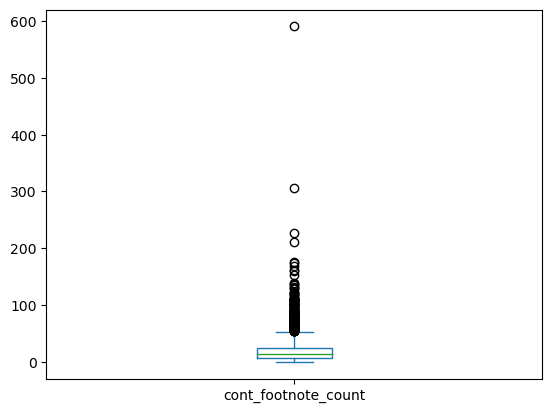

In [14]:
#
letter_df["cont_footnote_count"].plot.box()

a bit less crazy, when compared to the length of the letters

<Axes: >

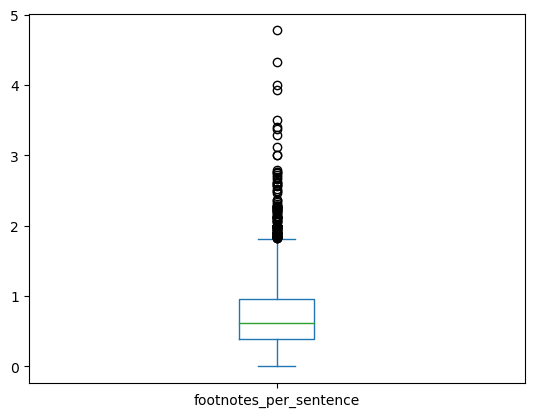

In [15]:
letter_df["footnotes_per_sentence"].plot.box()

The letter with 600 Footnotes is also a very long one. One letter has almost 5 content footnotes per sentence!!!

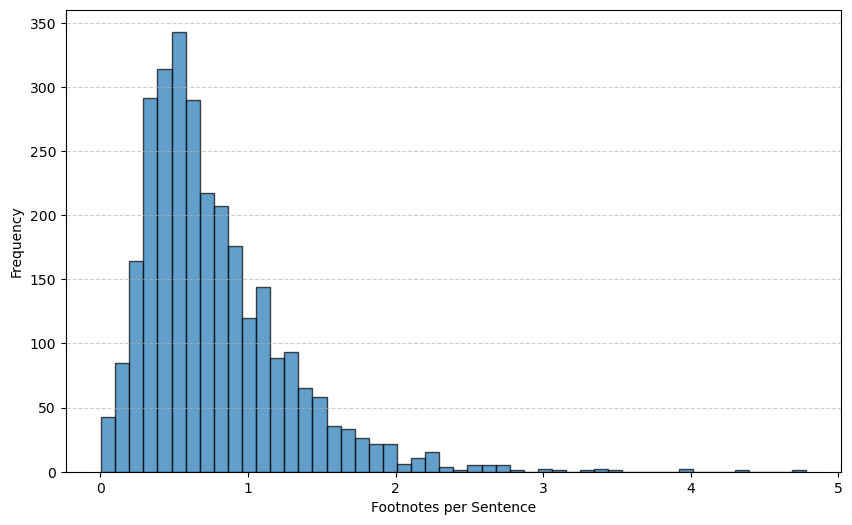

In [16]:

import matplotlib.pyplot as plt
import os
# Plot the histogram with increased number of bins
plot_series = letter_df["footnotes_per_sentence"]
plot_series = plot_series[plot_series>0]
plt.figure(figsize=(10, 6))
plt.hist(plot_series, bins=50, edgecolor='black', alpha=0.7)
plt.title('')
plt.xlabel('Footnotes per Sentence')
plt.ylabel('Frequency')
plt.grid(True, axis="y", linestyle='--', alpha=0.6)

# Show the plot
if True:  # save
    plot_folder = os.path.abspath(r"/mnt/c/Users/nik_b/Documents/UZH/CL/Master_thesis_text/master-thesis/images/plots")
    # plot_folder = "../plots"
    plot_name = "fnsPerSentence.pdf"  # Camel casing for latex...
    plt.savefig(os.path.join(plot_folder, plot_name), dpi=300, bbox_inches='tight',format='pdf')

In [17]:

letter_df[letter_df["cont_footnote_count"]==letter_df["cont_footnote_count"].max()]

,Unnamed: 0,letter_id,edition,sent_count,cont_footnote_count,ed_footnote_count,footnotes_per_sentence
30,30,10053,1,340,590,15,1.735294


In [18]:
letter_df[letter_df["footnotes_per_sentence"]==letter_df["footnotes_per_sentence"].max()]

,Unnamed: 0,letter_id,edition,sent_count,cont_footnote_count,ed_footnote_count,footnotes_per_sentence
2437,2437,12477,16,9,43,2,4.777778


Editions seem to have similar amount of footnotes per sentence

<Axes: title={'center': 'footnotes_per_sentence'}, xlabel='edition'>

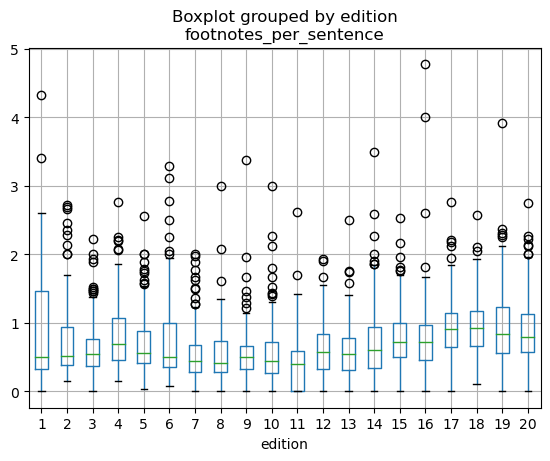

In [19]:
letter_df.boxplot(column="footnotes_per_sentence", by="edition")

### Filtering outlier letters

Defining outliers as bigger than Q3+1.5*IQR

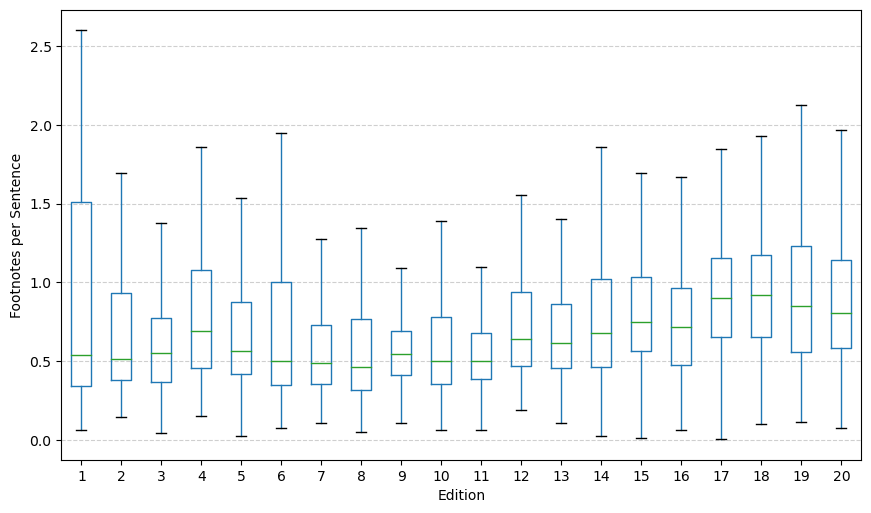

In [20]:
# plotting the data without outliers
# Note: The whiskers are drawn to the largest point WHITHIN Q3+1.5*IQR, that's why it does not necessarily reach it...

# Filter the data
plot_df = letter_df[letter_df["footnotes_per_sentence"] > 0]

# Create a figure and axis objects with custom figure size
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the boxplot on the created axis
plot_df.boxplot(column="footnotes_per_sentence", by="edition", showfliers=False, ax=ax)

# Set the title, xlabel, ylabel, and adjust grid
fig.suptitle('')  # Main title
ax.set_title('')  # Remove the default subtitle
ax.set_xlabel('Edition')
ax.set_ylabel('Footnotes per Sentence')

# Custom grid
ax.grid(True, axis="y", linestyle='--', alpha=0.6)
ax.grid(True, axis="x", linestyle='', alpha=0.6)

# Save the figure with the desired format and dpi
fig.savefig("../plots/fns_per_sentence_by_edition.svg", dpi=300, bbox_inches='tight', format='svg')



if True:  # save
    plot_folder = os.path.abspath(r"/mnt/c/Users/nik_b/Documents/UZH/CL/Master_thesis_text/master-thesis/images/plots")
    # plot_folder = "../plots"
    plot_name = "fnsPerSentenceByEdition.pdf"
    plt.savefig(os.path.join(plot_folder, plot_name), dpi=300, bbox_inches='tight',format='pdf')

Filtering keeps more than 95% of the data :D

In [13]:
from filtering import filter_df
letter_filtered_df = filter_df(letter_df, "footnotes_per_sentence", by="edition")
print('Total number of letters:', letter_df.shape[0])
print('Number of letters in filtered df:', letter_filtered_df.shape[0])
print('percentage:', letter_filtered_df.shape[0]/letter_df.shape[0])

Total number of letters: 3113
Number of letters in filtered df: 2993
percentage: 0.9614519755862512


The maximum is now 2.6 footnotes per sentence

In [14]:
letter_filtered_df[letter_df["footnotes_per_sentence"]==letter_filtered_df["footnotes_per_sentence"].max()]

/tmp/ipykernel_33450/3801324187.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  letter_filtered_df[letter_df["footnotes_per_sentence"]==letter_filtered_df["footnotes_per_sentence"].max()]


,Unnamed: 0,letter_id,edition,sent_count,cont_footnote_count,ed_footnote_count,footnotes_per_sentence
49,49,10072,1,10,26,1,2.6


## Footnote DF

In [15]:
pd.set_option('display.max_colwidth', None)  # show whole text in the cells
footnote_df = pd.read_csv("footnote_df.csv")

footnote_df.head()

,letter_id,edition,n_footnote,n_sentence,xml_footnote,xml_sentence,text_footnote,text_sentence,len_footnote,pos_footnote,label
0,10013,20,3,2,"<note xmlns=""http://www.tei-c.org/ns/1.0"" xml:id=""fn3"" type=""footnote"" n=""3""><persName ref=""p9709"" cert=""high"">Wolfgang Joner, gen. Rüplin</persName>, Abt des Zisterzienserklosters Kappel am Albis. - Er gründete die Klosterschule und ernannte am 17. Januar 1523 Bullinger zu deren Schulmeister; s. <bibl>HBBW</bibl> I <ref target=""file10017"">[Nr. 2]</ref> 48f, Anm. 4.</note>","<s xmlns=""http://www.tei-c.org/ns/1.0"" n=""2"" xml:lang=""la"" type=""auto"">Quid in hoc ęvo litteratissimo te iuvene venerando patri Volffgango Ruͤppli<note xml:id=""fn3"" type=""footnote"" n=""3""><persName ref=""p9709"" cert=""high"">Wolfgang Joner, gen. Rüplin</persName>, Abt des Zisterzienserklosters Kappel am Albis. - Er gründete die Klosterschule und ernannte am 17. Januar 1523 Bullinger zu deren Schulmeister; s. <bibl>HBBW</bibl> I <ref target=""file10017"">[Nr. 2]</ref> 48f, Anm. 4.</note> ac suis fratribus, tum singulis de sodalicio, foelicius obtigerit?</s>","Wolfgang Joner, gen. Rüplin, Abt des Zisterzienserklosters Kappel am Albis. - Er gründete die Klosterschule und ernannte am 17. Januar 1523 Bullinger zu deren Schulmeister; s. HBBW I [Nr. 2] 48f, Anm. 4.","Quid in hoc ęvo litteratissimo te iuvene venerando patri Volffgango Ruͤppli__3 ac suis fratribus, tum singulis de sodalicio, foelicius obtigerit?",33,10,self_ref
1,10013,20,4,3,"<note xmlns=""http://www.tei-c.org/ns/1.0"" xml:id=""fn4"" type=""footnote"" n=""4"">Vgl. dazu etwa Bullingers Aufzeichnungen über seine Lektüre während seiner Schul- und Studienzeit sowie als Lehrer im Kloster Kappel in <bibl>HBD</bibl> 2-8.</note>","<s xmlns=""http://www.tei-c.org/ns/1.0"" n=""3"" xml:lang=""la"" type=""auto"">Est profecto nihil, cui in promptu sint tot volumina a summis autoribus ędita,<note xml:id=""fn4"" type=""footnote"" n=""4"">Vgl. dazu etwa Bullingers Aufzeichnungen über seine Lektüre während seiner Schul- und Studienzeit sowie als Lehrer im Kloster Kappel in <bibl>HBD</bibl> 2-8.</note> quibus et tuum excercites<note xml:id=""fn5"" type=""footnote"" n=""5"">= exercites.</note> ingenium, quod tibi est in numerato, ut alias taceam dotes (invidia dictis absit!) sane quam pręclaras.</s>",Vgl. dazu etwa Bullingers Aufzeichnungen über seine Lektüre während seiner Schul- und Studienzeit sowie als Lehrer im Kloster Kappel in HBD 2-8.,"Est profecto nihil, cui in promptu sint tot volumina a summis autoribus ędita,__4 quibus et tuum excercites__5 ingenium, quod tibi est in numerato, ut alias taceam dotes (invidia dictis absit!) sane quam pręclaras.",22,12,misc
2,10013,20,5,3,"<note xmlns=""http://www.tei-c.org/ns/1.0"" xml:id=""fn5"" type=""footnote"" n=""5"">= exercites.</note>","<s xmlns=""http://www.tei-c.org/ns/1.0"" n=""3"" xml:lang=""la"" type=""auto"">Est profecto nihil, cui in promptu sint tot volumina a summis autoribus ędita,<note xml:id=""fn4"" type=""footnote"" n=""4"">Vgl. dazu etwa Bullingers Aufzeichnungen über seine Lektüre während seiner Schul- und Studienzeit sowie als Lehrer im Kloster Kappel in <bibl>HBD</bibl> 2-8.</note> quibus et tuum excercites<note xml:id=""fn5"" type=""footnote"" n=""5"">= exercites.</note> ingenium, quod tibi est in numerato, ut alias taceam dotes (invidia dictis absit!) sane quam pręclaras.</s>",= exercites.,"Est profecto nihil, cui in promptu sint tot volumina a summis autoribus ędita,__4 quibus et tuum excercites__5 ingenium, quod tibi est in numerato, ut alias taceam dotes (invidia dictis absit!) sane quam pręclaras.",2,16,lex
3,10013,20,6,4,"<note xmlns=""http://www.tei-c.org/ns/1.0"" xml:id=""fn6"" type=""footnote"" n=""6"">Die Rede ist hier von handschriftlichen Abhandlungen (die ersten gedruckten Schriften aus Bullingers Feder sind erst 1526 erschienen; s. <bibl>HBBibl</bibl> I 3f). In seinem Diarium listet Bullinger die von ihm in Kappel (1523-1529) verfassten Schriften auf (s. <bibl>HBD</b

In [16]:
# to view in the dataviewer debug this cell
test_df = footnote_df[footnote_df.label == "short"]
pass

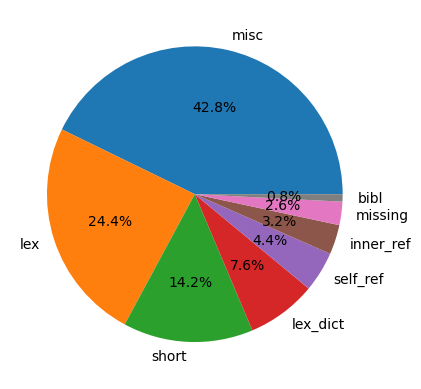

In [18]:
label_counts = footnote_df.label.value_counts()
label_counts.plot(kind="pie", autopct='%1.1f%%')
plt.ylabel("")
plt.show()

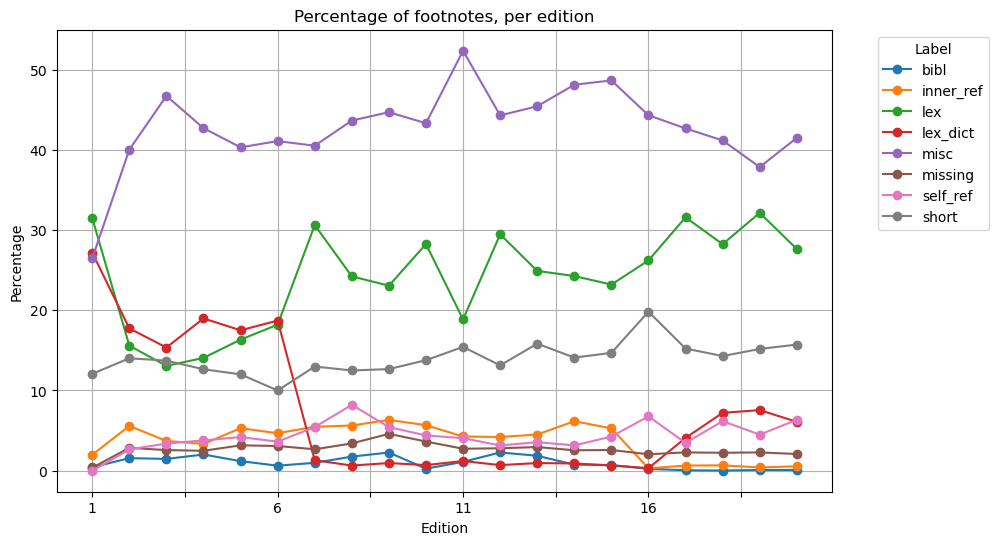

In [21]:
# todo: timeline over the editions with the categories. Best plot a line graph?
from bullinger_plots import label_trends
fig = label_trends(footnote_df)

if True:  # save
    plot_folder = os.path.abspath(r"/mnt/c/Users/nik_b/Documents/UZH/CL/Master_thesis_text/master-thesis/images/plots")
    # plot_folder = "../plots"
    plot_name = "distrOfLabelsByEdition.pdf"
    plt.savefig(os.path.join(plot_folder, plot_name), dpi=300, bbox_inches='tight',format='pdf')

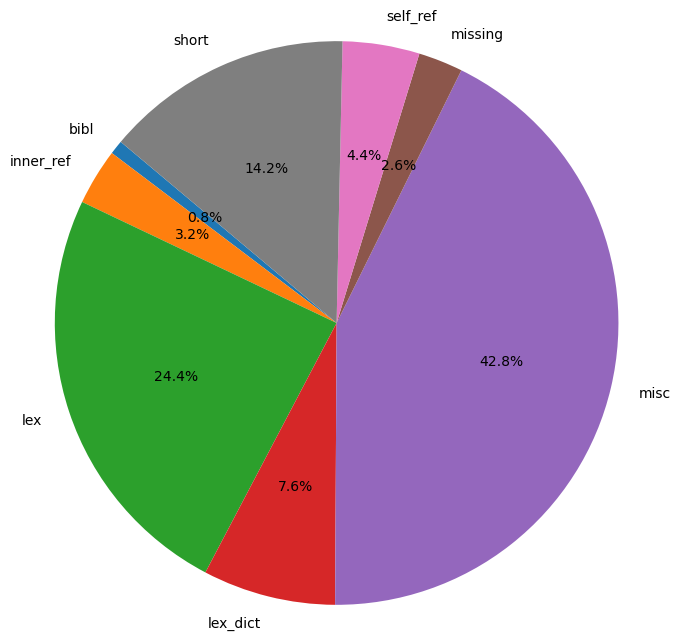

In [31]:
from bullinger_plots import label_pie
label_pie(footnote_df)

Some footnotes are crazy long...

<Axes: >

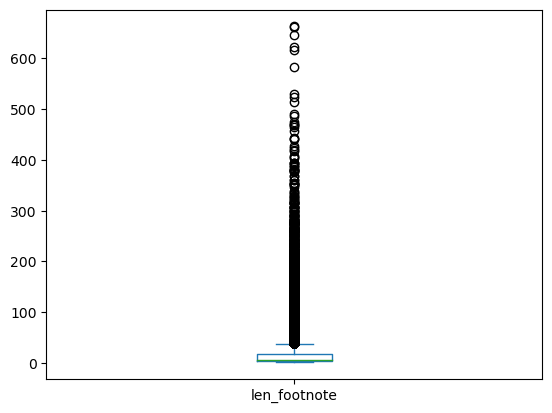

In [32]:
footnote_df["len_footnote"].plot.box()

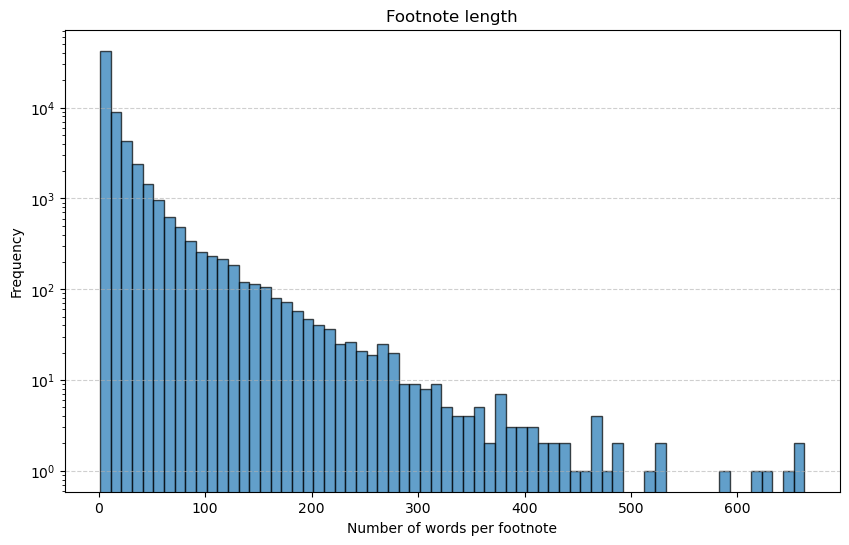

In [60]:


plot_series = footnote_df["len_footnote"]
# ensure bin width of 10
num_bins = (footnote_df["len_footnote"].max()-footnote_df["len_footnote"].min()) // 10

plt.figure(figsize=(10, 6))
plt.hist(plot_series, bins=num_bins, edgecolor='black', alpha=0.7)
plt.title('Footnote length')
plt.xlabel('Number of words per footnote')
plt.ylabel('Frequency')
plt.yscale("log")
plt.grid(True, axis="y", linestyle='--', alpha=0.6)


# Show the plot
if True:  # save
    plot_folder = os.path.abspath(r"/mnt/c/Users/nik_b/Documents/UZH/CL/Master_thesis_text/master-thesis/images/plots")
    # plot_folder = "../plots"
    plot_name = "fnLength.pdf"
    plt.savefig(os.path.join(plot_folder, plot_name), dpi=300, bbox_inches='tight',format='pdf')

In [24]:
import numpy as np
np.histogram(footnote_df["len_footnote"], bins=50)

(array([45876,  8447,  3638,  1858,  1139,   664,   439,   324,   297,
          239,   152,   141,   116,    90,    64,    52,    44,    35,
           25,    36,    22,    16,     9,    13,     7,     4,     7,
            4,     7,     6,     3,     3,     1,     3,     2,     4,
            1,     1,     1,     2,     0,     0,     0,     1,     0,
            0,     2,     0,     1,     2]),
 array([  1.  ,  14.24,  27.48,  40.72,  53.96,  67.2 ,  80.44,  93.68,
        106.92, 120.16, 133.4 , 146.64, 159.88, 173.12, 186.36, 199.6 ,
        212.84, 226.08, 239.32, 252.56, 265.8 , 279.04, 292.28, 305.52,
        318.76, 332.  , 345.24, 358.48, 371.72, 384.96, 398.2 , 411.44,
        424.68, 437.92, 451.16, 464.4 , 477.64, 490.88, 504.12, 517.36,
        530.6 , 543.84, 557.08, 570.32, 583.56, 596.8 , 610.04, 623.28,
        636.52, 649.76, 663.  ]))

this footnote is a small biography...

In [25]:
#
# footnote_df[footnote_df["len_footnote"]==footnote_df["len_footnote"].max()]

long footnotes exist across editions

<Axes: title={'center': 'len_footnote'}, xlabel='edition'>

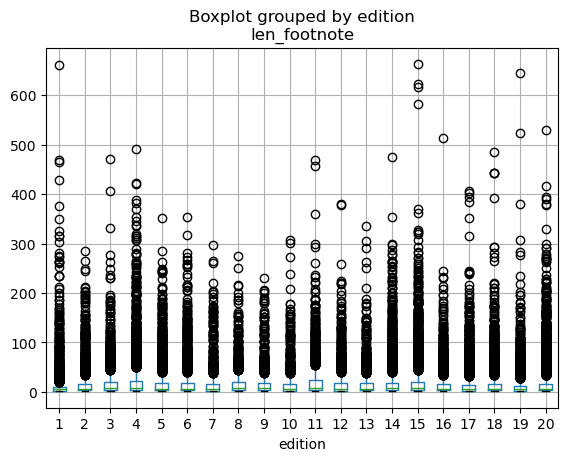

In [21]:
#
footnote_df.boxplot(column="len_footnote", by="edition")

We filter as with the letters

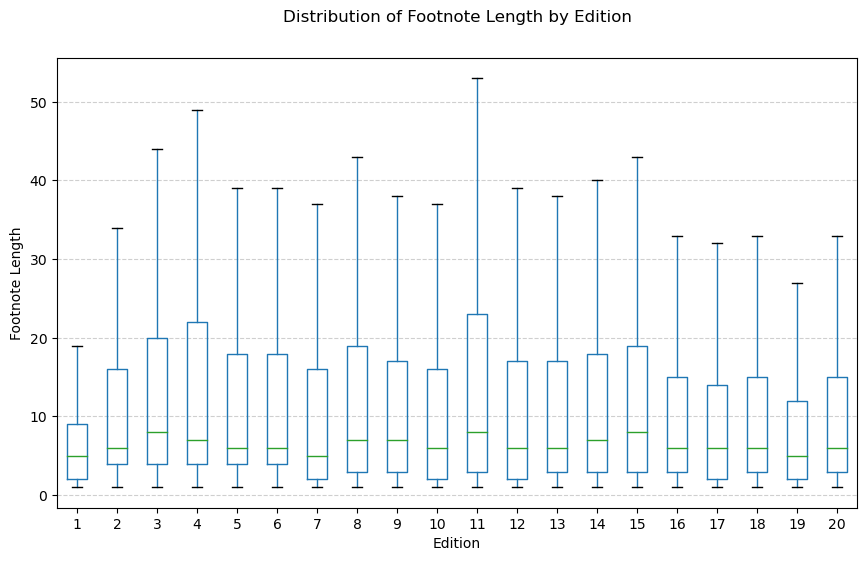

In [63]:

# Create a figure and axis objects with custom figure size
fig, ax = plt.subplots(figsize=(10, 6))

# Create a boxplot for the 'len_footnote' column, grouped by 'edition'
footnote_df.boxplot(column="len_footnote", by="edition", showfliers=False, ax=ax)

# Set the title, xlabel, ylabel, and adjust grid
fig.suptitle('Distribution of Footnote Length by Edition')  # Main title
ax.set_title('')  # Remove the default subtitle
ax.set_xlabel('Edition')
ax.set_ylabel('Footnote Length')

# Custom grid
ax.grid(True, axis="y", linestyle='--', alpha=0.6)
ax.grid(True, axis="x", linestyle='', alpha=0.6)

# Save the figure with the desired format and dpi
# fig.savefig("../plots/footnote_length_by_edition.svg", dpi=300, bbox_inches='tight', format='svg')

if True:  # save
    plot_folder = os.path.abspath(r"/mnt/c/Users/nik_b/Documents/UZH/CL/Master_thesis_text/master-thesis/images/plots")
    # plot_folder = "../plots"
    plot_name = "fnLengthByEdition.pdf"
    plt.savefig(os.path.join(plot_folder, plot_name), dpi=300, bbox_inches='tight',format='pdf')


We keep almost 90% of the data with the filtering. </br>
It does not make much of a difference in if we filter by edition or in general.
The upper limit when using toal IQR is 38, which is quite low for some editions

In [23]:
footnote_filtered_df = filter_df(footnote_df, "len_footnote", by="edition")
print("total number of FNs:", footnote_df.shape[0])
print("number of Footnotes without outliers: ", footnote_filtered_df.shape[0])
print("percentage: ", footnote_filtered_df.shape[0]/footnote_df.shape[0])

total number of FNs: 63798
number of Footnotes without outliers:  57352
percentage:  0.8989623499169253


# Preparing Letters for FN Generation

## data preparation:

- General prep
    - Take only the filtered letters, remove unecessary metadata (done)
    - remove all editorial footnotes (done)
    - from the content footnotes only keep the filtered ones (done)
    - remove the FNs that are lexical or "missing". (done)
    - take only those that are left with at least 2 FNs. The first one will be the example. (done)
    - train/val/test split, stratified by editions (done)

- prepare for the model
    - depending on strategy, take out all remaining footnotes
    - this could also be done just before sending the letter. But it might take up time...
    - take out only one footnote (would work better if there are a lot of other footnotes)
    - format?

    

We take out "missing", "lex" and "lex_dict" as those are categories, we do not care about generating

In [24]:
footnote_filtered_df = footnote_filtered_df[~footnote_filtered_df["label"].isin(["missing", "lex", "lex_dict"])]  # The '~makes the isin() negative
print("total number of FNs:", footnote_df.shape[0])
print("number of Footnotes without outliers and FNs of interes: ", footnote_filtered_df.shape[0])
print("percentage: ", footnote_filtered_df.shape[0]/footnote_df.shape[0])

total number of FNs: 63798
number of Footnotes without outliers and FNs of interes:  35518
percentage:  0.5567259161729208


Applying the downsizing, and saving the files

In [25]:
from collections import defaultdict
# get a dictionary with lists of footnotes to keep for each letter
footnotes_to_keep_dict = defaultdict(list)
for i, row in footnote_filtered_df.iterrows():
    footnotes_to_keep_dict[row["letter_id"]].append(row["n_footnote"])

In [26]:

letters_dir = "../../bullinger_source_data/letters"
filtered_dir = "../../data/downsized_letters"

# get filepaths to all letters that we filtered
filtered_letter_ids = letter_filtered_df['letter_id']


for id in tqdm(filtered_letter_ids):
    filepath = os.path.join(letters_dir, f"{id}.xml")
    with open(filepath, "r", encoding="utf-8") as infile:
        tree = etree.parse(infile)
        root = tree.getroot()
        new_tree = etree.ElementTree(downsize_tei(root, footnotes_to_keep_dict[id]))
        ed_footnote_count, cont_footnote_count = count_fns_in_letter(new_tree.getroot())
        if ed_footnote_count != 0:
            print("problem!! ed_footnote_count != 0")
        elif cont_footnote_count > 1:
            filename = os.path.basename(filepath)
            new_tree.write(os.path.join(filtered_dir, filename), encoding="utf-8", pretty_print=True)

  0%|          | 0/2993 [00:00<?, ?it/s]

100%|██████████| 2993/2993 [00:56<00:00, 52.53it/s]


Analyzing the downsized letters


In [38]:
letter_downsized_df = make_letter_df("../../data/downsized_letters", id_to_edition)
letter_downsized_df.to_csv("../../data/letter_downsized_df.csv")
letter_downsized_df.tail()

  0%|          | 0/2592 [00:00<?, ?it/s]

100%|██████████| 2592/2592 [00:17<00:00, 144.35it/s]


total content footnotes:  34013


,letter_id,edition,sent_count,cont_footnote_count,ed_footnote_count
2587,13147,20,17,7,0
2588,13148,20,66,33,0
2589,13149,20,43,16,0
2590,13151,20,19,7,0
2591,13152,20,12,3,0


In [28]:
# make_footnote_df("../../data/downsized_letters", "../../data/footnote_downsized_df.csv", id_to_edition)
# Total footnotes found: 34013
footnote_downsized_df = pd.read_csv("../../data/footnote_downsized_df.csv")

  0%|          | 0/2593 [00:00<?, ?it/s]

100%|██████████| 2593/2593 [00:22<00:00, 113.47it/s]


Total footnotes found: 34013


,letter_id,edition,n_footnote,n_sentence,xml_footnote,xml_sentence,text_footnote,text_sentence,len_footnote,pos_footnote,label
0,10013,20,3,2,"<note xmlns=""http://www.tei-c.org/ns/1.0"" xml:id=""fn3"" type=""footnote"" n=""3""><persName ref=""p9709"" cert=""high"">Wolfgang Joner, gen. Rüplin</persName>, Abt des Zisterzienserklosters Kappel am Albis. - Er gründete die Klosterschule und ernannte am 17. Januar 1523 Bullinger zu deren Schulmeister; s. <bibl>HBBW</bibl> I <ref target=""file10017"">[Nr. 2]</ref> 48f, Anm. 4.</note>","<s xmlns=""http://www.tei-c.org/ns/1.0"" n=""2"" xml:lang=""la"" type=""auto"">Quid in hoc ęvo litteratissimo te iuvene venerando patri Volffgango Ruͤppli<note xml:id=""fn3"" type=""footnote"" n=""3""><persName ref=""p9709"" cert=""high"">Wolfgang Joner, gen. Rüplin</persName>, Abt des Zisterzienserklosters Kappel am Albis. - Er gründete die Klosterschule und ernannte am 17. Januar 1523 Bullinger zu deren Schulmeister; s. <bibl>HBBW</bibl> I <ref target=""file10017"">[Nr. 2]</ref> 48f, Anm. 4.</note> ac suis fratribus, tum singulis de sodalicio, foelicius obtigerit?</s>","Wolfgang Joner, gen. Rüplin, Abt des Zisterzienserklosters Kappel am Albis. - Er gründete die Klosterschule und ernannte am 17. Januar 1523 Bullinger zu deren Schulmeister; s. HBBW I [Nr. 2] 48f, Anm. 4.","Quid in hoc ęvo litteratissimo te iuvene venerando patri Volffgango Ruͤppli__3 ac suis fratribus, tum singulis de sodalicio, foelicius obtigerit?",33,10,self_ref
1,10013,20,4,3,"<note xmlns=""http://www.tei-c.org/ns/1.0"" xml:id=""fn4"" type=""footnote"" n=""4"">Vgl. dazu etwa Bullingers Aufzeichnungen über seine Lektüre während seiner Schul- und Studienzeit sowie als Lehrer im Kloster Kappel in <bibl>HBD</bibl> 2-8.</note>","<s xmlns=""http://www.tei-c.org/ns/1.0"" n=""3"" xml:lang=""la"" type=""auto"">Est profecto nihil, cui in promptu sint tot volumina a summis autoribus ędita,<note xml:id=""fn4"" type=""footnote"" n=""4"">Vgl. dazu etwa Bullingers Aufzeichnungen über seine Lektüre während seiner Schul- und Studienzeit sowie als Lehrer im Kloster Kappel in <bibl>HBD</bibl> 2-8.</note> quibus et tuum excercites ingenium, quod tibi est in numerato, ut alias taceam dotes (invidia dictis absit!) sane quam pręclaras.</s>",Vgl. dazu etwa Bullingers Aufzeichnungen über seine Lektüre während seiner Schul- und Studienzeit sowie als Lehrer im Kloster Kappel in HBD 2-8.,"Est profecto nihil, cui in promptu sint tot volumina a summis autoribus ędita,__4 quibus et tuum excercites ingenium, quod tibi est in numerato, ut alias taceam dotes (invidia dictis absit!) sane quam pręclaras.",22,12,misc
2,10013,20,7,6,"<note xmlns=""http://www.tei-c.org/ns/1.0"" xml:id=""fn7"" type=""footnote"" n=""7"">Cicero, Tusculanae disputationes, 1, 2, 4.</note>","<s xmlns=""http://www.tei-c.org/ns/1.0"" n=""6"" xml:lang=""la"" type=""auto"">Iacentque ea semper, quę apud quosque improbantur.“<note xml:id=""fn7"" type=""footnote"" n=""7"">Cicero, Tusculanae disputationes, 1, 2, 4.</note></s>","Cicero, Tusculanae disputationes, 1, 2, 4.","Iacentque ea semper, quę apud quosque improbantur.“__7",6,6,misc
3,10013,20,8,7,"<note xmlns=""http://www.tei-c.org/ns/1.0"" xml:id=""fn8"" type=""footnote"" n=""8""><cit type=""bible""><ref>1Kor 2, 2</ref></cit>.</note>","<s xmlns=""http://www.tei-c.org/ns/1.0"" n=""7"" xml:lang=""la"" type=""auto"">Sis evectus licet pene ad culmen doctrinarum, nil tamen arrogas tibi iactabundus, pręterquam scire Christum et hunc cruci suffixum.<note xml:id=""fn8"" type=""footnote"" n=""8""><cit type=""bible""><ref>1Kor 2, 2</ref></cit>.</note></s>","1Kor 2, 2.","Sis evectus licet pene ad culmen doctrinarum, nil tamen arrogas tibi iactabundus, pręterquam scire Christum et hunc cruci suffixum.__8",3,18,short
4,10013,20,9,12,"<note xmlns=""http://www.tei-c.org/ns/1.0"" xml:id=""fn9"" type=""footnote"" n=""9"">Siehe <persName ref=""p18991"" cert=""high"">Plinius d.Ä.</persName>, Naturalis historia, 10, 63.</note>","<s xmlns=""http://www.tei-c.org/ns/

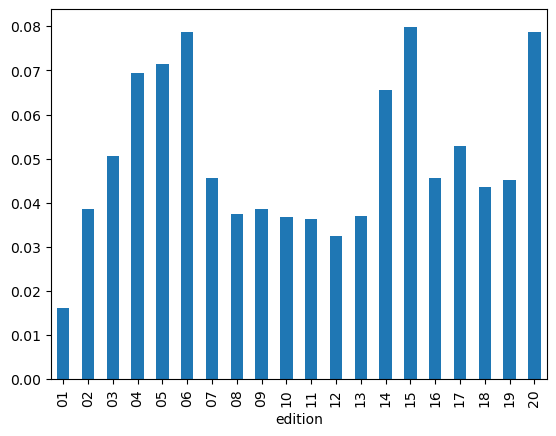

In [29]:
# number of letters per edition
def plot_edition_bar(df):
    df["edition"].value_counts(normalize=True).sort_index().plot(kind="bar")
plot_edition_bar(letter_downsized_df)

In [30]:
from sklearn.model_selection import train_test_split
train_df, test_df = train_test_split(letter_downsized_df, test_size=0.2, stratify=letter_downsized_df["edition"])
test_df, val_df = train_test_split(test_df, test_size = 0.5, stratify=test_df["edition"])


In [31]:
import json
strat_sample_dict = {
    "train": list(train_df["letter_id"]),
    "dev": list(val_df["letter_id"]),
    "test": list(test_df["letter_id"])
}
with open("../../data/strat_sample.json", "w", encoding="utf-8") as outjson:
    json.dump(strat_sample_dict, outjson)


In [35]:
for split in strat_sample_dict:
    print(f"Number of Samples in the {split}-set: {len(strat_sample_dict[split])}")

Number of Samples in the train-set: 2073
Number of Samples in the dev-set: 260
Number of Samples in the test-set: 259
